# SUMMER INTERNSHIP PROJECT - 1

# Topic: Building a Neural Network Model

Project by: Nishtha Virmani(18csu144)

# Importing the packages 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
%matplotlib inline

np.random.seed(1) # to ensure that the results are consistent

# About the Dataset

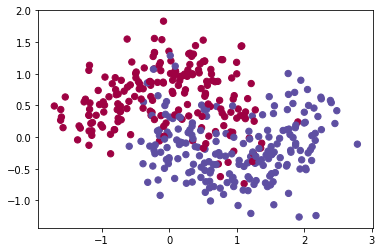

In [19]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(400, noise=0.35)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


By applying the Neural Network Model on this dataset, we are going to predict wether the datapoint is RED or BLUE.

# Apply Logistic Regression

In [20]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

C:\Users\Nishtha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [21]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

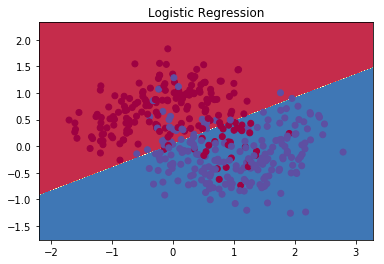

In [22]:
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

As we can see through the above graph, logistic regrrssion does not accurately predict the data points by the decision boundary. So hence we will build nueral network for more accurate prediction.

# Build and Train the Neural Network

First, we fix the size of the input layer,output layer and the number of elements in the training set. Then further the parameters for the gradient decent.

In [23]:
m = len(X) 
nn_x = 2
nn_y = 2 
epsilon = 0.01    # learning rate for gradient descent
reg_lambda = 0.01  # regularization strength

Then we create a loss function for our model which determines how good our algorithm is working.

In [24]:
def calculate_loss(nn_model):
    W1, b1, W2, b2 = nn_model['W1'], nn_model['b1'], nn_model['W2'], nn_model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(m), y])
    data_loss = np.sum(corect_logprobs)

Then further, we create a predict function, which will predict whether the data point will be blue or red using probabilties calculated by the tanh function.

In [25]:
def predict(nn_model, x):
    W1, b1, W2, b2 = nn_model['W1'], nn_model['b1'], nn_model['W2'], nn_model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Now, we finally combine all the created functions and build our neural network model.

In [26]:
def build_model(nn_hid, num_passes=20000):
    # Initialize the parameters to random values.
    np.random.seed(0)
    W1 = np.random.randn(nn_x, nn_hid) / np.sqrt(nn_x)
    b1 = np.zeros((1, nn_hid))
    W2 = np.random.randn(nn_hid, nn_y) / np.sqrt(nn_hid)
    b2 = np.zeros((1, nn_y))
    nn_model = {}
    
    # Gradient descent
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(m), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Adding regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assigning new parameters to the model
        nn_model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
    
    return nn_model

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

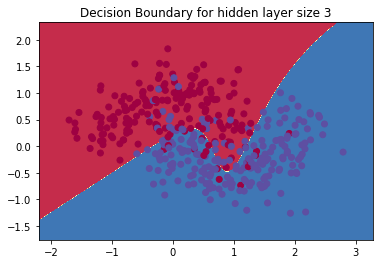

In [27]:
nn_model = build_model(3)
plot_decision_boundary(lambda x: predict(nn_model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [28]:
predictions = predict(nn_model, X)
print ('Accuracy: %d' % float((np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / float(y.size) * 100) + '%')

Accuracy: 87%


The graph above shows hiw the decision boundary will be created when the number of hidden layers is 3.
Next we will see how the decision boundary changes for different values of the numner of hidden layers in our model.

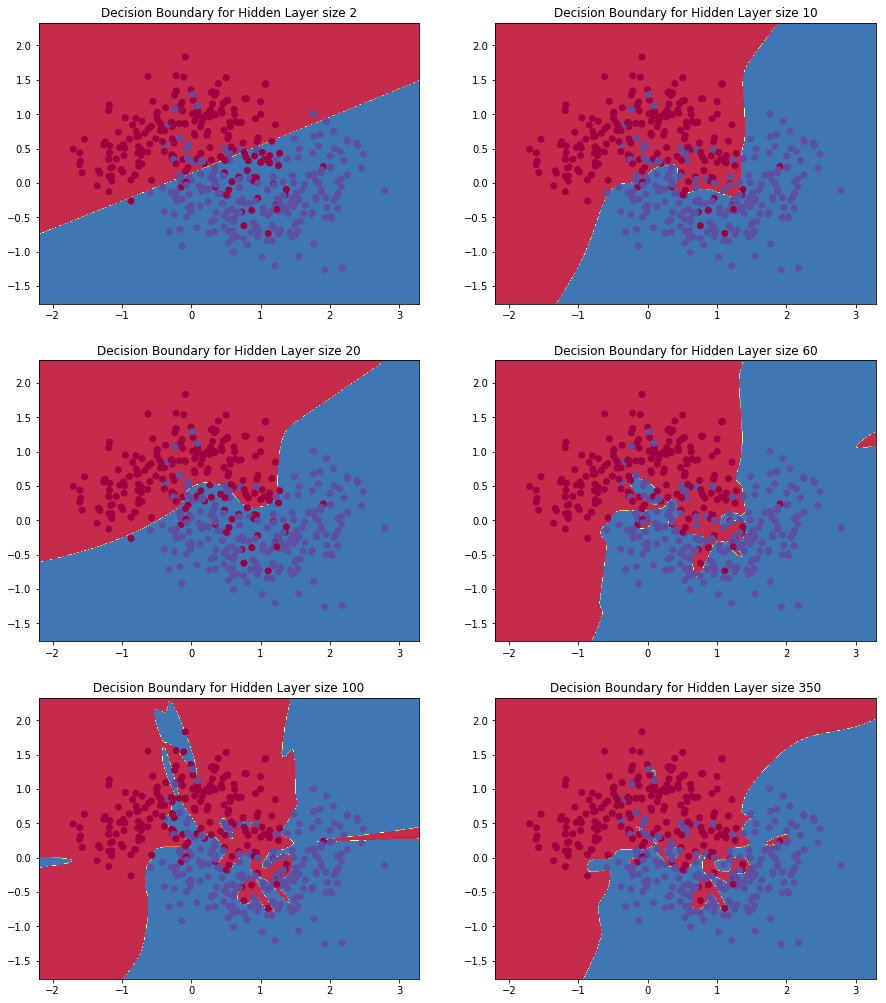

In [15]:
plt.figure(figsize=(15, 30))
hidden_layer_dimensions = [2,10, 20,60,100,350]
for i, nn_hid in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Decision Boundary for Hidden Layer size %d' % nn_hid)
    nn_model = build_model(nn_hid)
    plot_decision_boundary(lambda x: predict(nn_model, x))
plt.show()

On observing the above graphs we can say that more the number of hidden layers, more precise will be our prediction. 

# THANK YOU!